**Hindi Text to Speech Training using Tacotron 2**

Recent TTS systems use the powerful neural network architecture and principles of deep learning to achieve state-of-the-art performance across languages. Text-to-speech (TTS) synthesis is typically done in two steps.

* Transform the text into time-aligned features, such as mel-spectrograms, or F0 frequencies and other linguistic features;

* Convert the time-aligned features into audio.

Tacotron 2 is one such neural network architecture used for speech synthesis  from text. 

The system is composed of a recurrent sequence-to-sequence feature prediction network that maps character embeddings to mel-spectrograms.

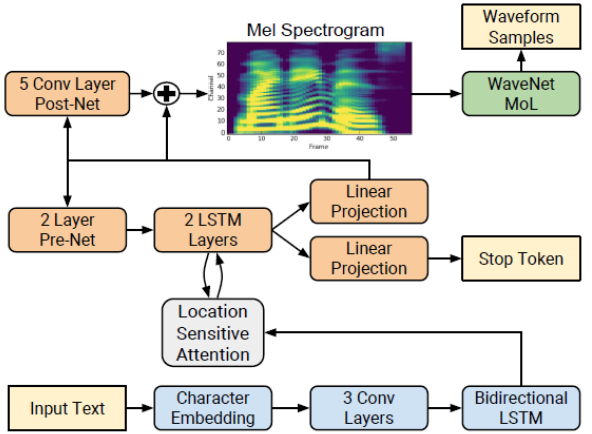



The network is composed of an encoder (blue) and a decoder (orange) with attention. 

The encoder converts a character sequence into a hidden feature representation, which serves as input to the decoder to predict a spectrogram. 

The encoder output is passed to an attention network (gray) which summarizes the full encoded sequence as a fixed-length context vector for each decoder output step.

The decoder is an autoregressive recurrent neural network which predicts a mel spectrogram from the encoded input sequence one frame at a time. 

**Step 1: Download the tacotron 2 repository by following the steps mentioned here - https://github.com/NVIDIA/tacotron2 . Make sure to download their published open source Tacotron 2 and Waveglow model too**

**Step 2: Preparing the dataset: Refer to the sample_dataset.txt file in this repository to take a look at how the dataset should look like. Prepare three files - "hi_audio_text_train_filelist.txt" , "hi_audio_text_val_filelist.txt" , "hi_audio_text_test_filelist.txt" corresponding to train, val and test set and place it in the ./tacotron2/filelists/ folder.**

**Step 3: Mounting the Google Drive** (ignore if running on local system)

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

**Step 4: Installing dependencies**

In [ ]:
!pip install unidecode

**Step 5: Migrating to the tacotron 2 folder which contains all the scripts and changing the tensorflow version to 1.xx needed for the training process**

The below code was run on google colab. If you are running on your local system, make sure to run it on an environment which has tensorflow 1.x version. Migrate to the tacotron2 folder that you have installed accordingly. 

In [ ]:
%cd "/content/drive/MyDrive/SSMT/tacotron2"
%tensorflow_version 1.x

**Step 6: Training Process**

One of the remarkable features of the Tacotron 2 framework is the ability to extend it to various languages. English language is by far the most popular language in the world. Deep learning relies heavily on the availibility of data and due to abundant resources in the English language, we have close to Human results in a lot of English NLP Tasks. 

However, the same cannot be said for Indian languages like Hindi and Marathi. Due to lack of transcribed data, training from scratch for these languages may not lead to convergence and good results for developers. 

Hence, we use the principles of **transfer learning** to jumpstart the training process. We use the pretrained open source checkpoint of the English model (trained on many hours of high-quality English Text-Speech data) and start finetuning on Hindi Text-Speech Data. To match the characters across languages, we use a transliteration layer on the text input before the training process.

In [ ]:
!python train.py --output_directory=/content/drive/MyDrive/SSMT/checkpoints/trial_run --log_directory=/content/drive/MyDrive/SSMT/log_directory -c /content/drive/MyDrive/SSMT/tacotron2_statedict_pretrained.pt --warm_start

**References**



* "Natural TTS Synthesis by Conditioning WaveNet on Mel Spectrogram Predictions" - Shen et al, ICASSP 2018

* Indic TTS Databasee - IIT Madras : https://www.iitm.ac.in/donlab/tts/index.php

*   Blog on English TTS Using Tacotron 2 and WaveGlow by Nvidia: https://developer.nvidia.com/blog/generate-natural-sounding-speech-from-text-in-real-time/

*   Tacotron 2 Github: https://github.com/NVIDIA/tacotron2




